<a href="https://mybinder.org/v2/gh/homalg-project/CapHomalgNotebooks/master?filepath=TiltingEquivalence.ipynb" target="_top"><img src="https://img.shields.io/badge/Launch%20homalg%E2%80%93project%20version%20interactively%20on-binder-579ACA.svg?logo=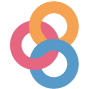" alt="binder"></a>



## Tilting equivalence

Let $k$ be field of characteristic $0$ and $\mathrm{D}^\mathrm{b}(\mathfrak{Coh}\, \mathbb{P}^2_k)$ denote the bounded derived category of coherent sheaves on $\mathbb{P}^2_k$.

Consider the full strong exceptional collection $\{\mathcal{O}(0), \mathcal{O}(1), \mathcal{O}(2)\} \subset \mathfrak{Coh}\, \mathbb{P}^2_k$ of the three twisted line bundles with their tilting object
$$
  T_\mathcal{O} := \mathcal{O}(0) \oplus \mathcal{O}(1) \oplus \mathcal{O}(2) \mbox{.}
$$

Consider the second full strong exceptional collection $\{ \Omega^0(0), \Omega^1(1), \Omega^2(2) = \mathcal{O}(0)\} \subset \mathfrak{Coh}\, \mathbb{P}^2_k$ of twisted contangent bundles with their tilting object
$$
  T_\Omega := \Omega^0(0) \oplus \Omega^1(1) \oplus \Omega^2(2) \mbox{.}
$$

Then
$$
  \mathrm{D}^\mathrm{b}(\mathfrak{Coh}\, \mathbb{P}^2_k) \simeq \mathrm{D}^\mathrm{b}(\mathrm{End}\, T_\Omega) \simeq \mathrm{D}^\mathrm{b}(\mathrm{End}\, T_\mathcal{O}) \mbox{,}
$$
where for a finite dimensional algebra $A$ we denote by $\mathrm{D}^\mathrm{b}(A) := \mathrm{D}^\mathrm{b}(A\mathrm{-mod})$ the bounded derived category of the Abelian category $A\mathrm{-mod}$ of finite dimensional $A$-modules.


In this notebook we will consider $T_\Omega$ as a tilting object in $\mathrm{D}^\mathrm{b}(\mathrm{End}\, T_\mathcal{O})$ and construct tilting equivalences
$$
  F: \mathrm{D}^\mathrm{b}(\operatorname{End}\, T_\Omega) \rightleftarrows \mathrm{D}^\mathrm{b}(\operatorname{End}\, T_\mathcal{O}) : G \mbox{.}
$$

For a finite dimensional algebra $A$ over a field $k$ we define its decomposition algebroid $A^\mathrm{dec}$ as the $k$-linear full subcategory of $A\mathrm{-mod}$ consisting of the summands of a direct sum decomposition of $A$ in indecomposables, which are necessarily projective $A$-modules. The additive closure $A^\mathrm{dec}_\oplus$ of the algebroid $A^\mathrm{dec}$ is then the closure of $A$ (considered as a linear category on one object) under direct sums and direct summands (in $A\mathrm{-mod}$). One recovers $A$ as the direct sum of the $\mathrm{Hom}$-groups of $A^\mathrm{dec}$. If $A^\mathrm{sdec}$ is a skeleton of $A^\mathrm{dec}$, then the direct sum of $\mathrm{Hom}$-groups of $A^\mathrm{sdec}$ is the basic algebra which is Morita-equivalent to $A$.

The category $A^\mathrm{dec}_\oplus \simeq A^\mathrm{sdec}_\oplus$ is a model for the additive full subcategory of projective objects in $A\mathrm{-mod}$, where the second model is skeletal.

We model $A\mathrm{-mod}$ as the functor category $[A^\mathrm{op}, k\mathrm{-vec}]$, where $A^\mathrm{op}$ is the opposite algebra of $A$ (viewed as an algebroid with one object), and $k\mathrm{-vec}$ is the (skeletal) Abelian category of finite dimensional $k$-vector spaces. This is equivalent to the category of representations of the quiver underlying the algebroid $(A^\mathrm{op})^\mathrm{dec} \simeq (A^\mathrm{dec})^\mathrm{op}$. The identification of $A^\mathrm{dec}$ with the $k$-linear full subcategory of indecomposable projective objects in the Abelian category $A\mathrm{-mod} := [A^\mathrm{op}, k\mathrm{-vec}] \simeq [(A^\mathrm{op})^\mathrm{dec}, k\mathrm{-vec}] \simeq [(A^\mathrm{dec})^\mathrm{op}, k\mathrm{-vec}]$ is then nothing but Yoneda's embedding. This embedding factors over the embedding $A^\mathrm{dec}_\oplus \hookrightarrow [(A^\mathrm{dec})^\mathrm{op}, k\mathrm{-vec}] \simeq A\mathrm{-mod}$.

We model the bounded derived category $\mathrm{D}^\mathrm{b}(A)$ by the bounded homotopy category $\mathrm{Ho}^\mathrm{b}\!\left(A^\mathrm{dec}_\oplus\right)$.

In [1]:
using HomalgProject

HomalgProject v0.5.6
Imported OSCAR's components GAP, Nemo, and Singular
Type: ?HomalgProject for more information


---
We start by loading the GAP package `DerivedCategories` and some of the presetting which will give us the colorful output below:

In [2]:
LoadPackage( "DerivedCategories" )

In [3]:
ReadPackage( g"DerivedCategories", g"examples/pre_settings.g" ); GAP.Globals.ENABLE_COLORS = true

true

---
Define the field of rationals over which our categories will be linear:

In [4]:
ℚ = HomalgFieldOfRationals()

GAP: Q

---
Next we define the quiver:

In [5]:
q = RightQuiver( "q_𝓞",
          [ "𝓞(0)", "𝓞(1)", "𝓞(2)" ],
          [ "x0", "x1", "x2", "y0", "y1", "y2" ],
          [ 1, 1, 1, 2, 2, 2 ],
          [ 2, 2, 2, 3, 3, 3 ] )
SetLabelsAsLaTeXStrings( q, [ "x_1", "x_2", "x_3", "y_0", "y_1", "y_2" ] )

In [6]:
Qq = PathAlgebra( ℚ, q )

GAP: Q * q_𝓞

In [7]:
EndT_𝓞 = Qq / [ Qq.x0*Qq.y1-Qq.x1*Qq.y0, Qq.x0*Qq.y2-Qq.x2*Qq.y0, Qq.x1*Qq.y2-Qq.x2*Qq.y1 ];

In [8]:
SetName( EndT_𝓞, g"End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) )" ); EndT_𝓞

GAP: End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) )

In [9]:
Dimension( EndT_𝓞 )

15

---
Define the opposite algebra, mainly to set its name: 

In [10]:
EndT_𝓞op = OppositeAlgebra( EndT_𝓞 ); SetName( EndT_𝓞op, g"End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) )^op" ); EndT_𝓞op

GAP: End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) )^op

Define the additive closure $(\mathrm{End}\, T_\mathcal{O})^\mathrm{dec}_\oplus$ of the endomorphism algebroid $(\mathrm{End}\, T_\mathcal{O})^\mathrm{dec}$:

In [11]:
QRows = QuiverRows( EndT_𝓞 )

GAP: Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) )

Define the collection $\{\Omega^0(0), \Omega^1(1), \Omega^2(2)\}$ as a full strong exceptional collection in the bounded homotopy category $\mathrm{Ho}^\mathrm{b}\!\left((\mathrm{End}\, T_\mathcal{O})^\mathrm{dec}_\oplus\right) \simeq \mathrm{D}^\mathrm{b}(\operatorname{End}\, T_\mathcal{O})$:

In [12]:
a_0 = QuiverRowsObject( [ [ q."𝓞(0)", 3 ] ], QRows )

GAP: <An object in Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) defined by 3 quiver vertices>

In [13]:
Show( a_0 )

In [14]:
a_m1 = QuiverRowsObject( [ [ q."𝓞(1)", 3 ] ], QRows )

GAP: <An object in Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) defined by 3 quiver vertices>

In [15]:
Show( a_m1 )

In [16]:
a_m2 = QuiverRowsObject( [ [ q."𝓞(2)", 1 ] ], QRows )

GAP: <An object in Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) defined by 1 quiver vertices>

In [17]:
Show( a_m2 )

In [18]:
d_0 = QuiverRowsMorphism(
          a_0,
          [ [ EndT_𝓞.x1, -EndT_𝓞.x0, Zero(EndT_𝓞) ],
            [ EndT_𝓞.x2, Zero(EndT_𝓞), -EndT_𝓞.x0 ],
            [ Zero(EndT_𝓞), EndT_𝓞.x2, -EndT_𝓞.x1 ] ],
          a_m1 )

GAP: <A morphism in Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) defined by a 3 x 3 matrix of quiver algebra elements>

In [19]:
IsWellDefined( d_0 )

true

In [20]:
Show( d_0 )

In [21]:
d_m1 = QuiverRowsMorphism(
          a_m1,
          [ [ EndT_𝓞.y0 ],
            [ EndT_𝓞.y1 ],
            [ EndT_𝓞.y2 ] ],
          a_m2 )

GAP: <A morphism in Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) defined by a 3 x 1 matrix of quiver algebra elements>

In [22]:
IsWellDefined( d_m1 )

true

In [23]:
Show( d_m1 )

In [24]:
Ω00 = HomotopyCategoryObject( [ d_m1, d_0 ], -1 )

GAP: <An object in Homotopy category( Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound -2 and active upper bound 0>

In [25]:
IsWellDefined( Ω00 )

true

In [26]:
Show( Ω00 )

In [27]:
a_0 = QuiverRowsObject( [ [ q."𝓞(0)", 3 ] ], QRows )

GAP: <An object in Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) defined by 3 quiver vertices>

In [28]:
Show( a_0 )

In [29]:
a_m1 = QuiverRowsObject( [ [ q."𝓞(1)", 1 ] ], QRows )

GAP: <An object in Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) defined by 1 quiver vertices>

In [30]:
Show( a_m1 )

In [31]:
d_0 = QuiverRowsMorphism(
          a_0,
          [ [ EndT_𝓞.x0 ],
            [ EndT_𝓞.x1 ],
            [ EndT_𝓞.x2 ] ],
          a_m1 )

GAP: <A morphism in Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) defined by a 3 x 1 matrix of quiver algebra elements>

In [32]:
Show( d_0 )

In [33]:
Ω11 = HomotopyCategoryObject( [ d_0 ], 0 )

GAP: <An object in Homotopy category( Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound -1 and active upper bound 0>

In [34]:
Show( Ω11 )

In [35]:
a_0 = QuiverRowsObject( [ [ q."𝓞(0)", 1 ] ], QRows )

GAP: <An object in Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) defined by 1 quiver vertices>

In [36]:
Show( a_0 )

In [37]:
d_0 = UniversalMorphismIntoZeroObject( a_0 )

GAP: <A morphism in Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) defined by a 1 x 0 matrix of quiver algebra elements>

In [38]:
Show( d_0 )

In [39]:
Ω22 = HomotopyCategoryObject( [ d_0 ], 0 )

GAP: <An object in Homotopy category( Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound -1 and active upper bound 0>

In [40]:
Show( Ω22 )

In [41]:
Ω = CreateExceptionalCollection( [ Ω00, Ω11, Ω22 ], [ "Ω^0(0)", "Ω^1(1)", "Ω^2(2)" ] )

GAP: <An exceptional collection defined by the objects of the Full subcategory generated by 3 objects in Homotopy category( Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) )>

In [42]:
EndT_Ω = EndomorphismAlgebra( Ω )

GAP: End( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) )

In [43]:
Dimension( EndT_Ω )

12

---
Now construct the tilting equivalences
$$
  F: \mathrm{D}^\mathrm{b}(\operatorname{End}\, T_\Omega) \rightleftarrows \mathrm{D}^\mathrm{b}(\operatorname{End}\, T_\mathcal{O}) :G \mbox{.}
$$
as an equivalence between the homotopy models:
$$
  F: \mathrm{Ho}^\mathrm{b}\!\left((\mathrm{End}\, T_\Omega)^\mathrm{dec}_\oplus\right) \rightleftarrows \mathrm{Ho}^\mathrm{b}\!\left((\mathrm{End}\, T_\mathcal{O})^\mathrm{dec}_\oplus\right) :G
$$

In [44]:
F = ConvolutionFunctorFromHomotopyCategoryOfQuiverRows( Ω )

GAP: Convolution functor

In [45]:
Display( F )

Convolution functor:

Homotopy category( Quiver rows( End( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) ) ) )
  |
  V
Homotopy category( Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) )


In [46]:
HoEndT_Ω = SourceOfFunctor( F )

GAP: Homotopy category( Quiver rows( End( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) ) ) )

In [47]:
HoEndT_𝓞 = RangeOfFunctor( F )

GAP: Homotopy category( Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) )

In [48]:
G = ReplacementFunctorIntoHomotopyCategoryOfQuiverRows( Ω )

GAP: Replacement functor

In [49]:
Display( G )

Replacement functor:

Homotopy category( Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) )
  |
  V
Homotopy category( Quiver rows( End( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) ) ) )


---
Consider the images of the three twisted line bundles $\{\mathcal{O}(0), \mathcal{O}(1), \mathcal{O}(2)\} \subset \mathrm{Ho}^\mathrm{b}\!\left((\mathrm{End}\, T_𝓞)^\mathrm{dec}_\oplus\right)$ under the tilting equivalence
$$
  G: \mathrm{Ho}^\mathrm{b}\!\left((\operatorname{End}\, T_\mathcal{O})^\mathrm{dec}_\oplus \right) \rightarrow \mathrm{Ho}^\mathrm{b}\!\left((\operatorname{End}\, T_\Omega)^\mathrm{dec}_\oplus \right) \mbox{.}
$$

In [50]:
𝓞0 = HoEndT_𝓞."𝓞(0)"

GAP: <An object in Homotopy category( Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound 0 and active upper bound 0>

In [51]:
Show( 𝓞0 )

In [52]:
𝓞1 = HoEndT_𝓞."𝓞(1)"

GAP: <An object in Homotopy category( Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound 0 and active upper bound 0>

In [53]:
Show( 𝓞1 )

In [54]:
𝓞2 = HoEndT_𝓞."𝓞(2)"

GAP: <An object in Homotopy category( Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound 0 and active upper bound 0>

In [55]:
Show( 𝓞2 )

In [56]:
G𝓞0 = G( 𝓞0 )

GAP: <An object in Homotopy category( Quiver rows( End( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) ) ) ) with active lower bound 0 and active upper bound 0>

In [57]:
Show( G𝓞0 )

In [58]:
G𝓞1 = G( 𝓞1 )

GAP: <An object in Homotopy category( Quiver rows( End( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) ) ) ) with active lower bound 0 and active upper bound 1>

In [59]:
Show( G𝓞1 )

In [60]:
G𝓞2 = G( 𝓞2 )

GAP: <An object in Homotopy category( Quiver rows( End( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) ) ) ) with active lower bound 0 and active upper bound 2>

In [61]:
Show( G𝓞2 )

---
Consider the images of the three twisted line bundles $\{\Omega^0(0), \Omega^1(1), \Omega^2(2)\} \subset \mathrm{Ho}^\mathrm{b}\!\left((\mathrm{End}\, T_\Omega)^\mathrm{dec}_\oplus\right)$ under the tilting equivalence
$$
  F: \mathrm{Ho}^\mathrm{b}\!\left((\operatorname{End}\, T_\Omega)^\mathrm{dec}_\oplus \right) \rightarrow \mathrm{Ho}^\mathrm{b}\!\left((\operatorname{End}\, T_\mathcal{O})^\mathrm{dec}_\oplus \right) \mbox{.}
$$

In [62]:
FΩ00 = F( HoEndT_Ω."Ω^0(0)" )

GAP: <An object in Homotopy category( Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound -2 and active upper bound 0>

In [63]:
Show( FΩ00 )

In [64]:
Show( Ω00 )

In [65]:
FΩ11 = F( HoEndT_Ω."Ω^1(1)" )

GAP: <An object in Homotopy category( Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound -1 and active upper bound 0>

In [66]:
Show( FΩ11 )

In [67]:
FΩ22 = F( HoEndT_Ω."Ω^2(2)" )

GAP: <An object in Homotopy category( Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound 0 and active upper bound 0>

In [68]:
Show( FΩ22 )

---
Define the equivalences
$$
  I: \mathrm{Ho}^\mathrm{b}\!\left((\operatorname{End}\, T_\mathcal{O})^\mathrm{dec}_\oplus \right) \to \mathrm{D}^\mathrm{b}(\mathrm{End}\, T_\mathcal{O}) \mbox{,}
$$
and
$$
  J: \mathrm{Ho}^\mathrm{b}\!\left((\operatorname{End}\, T_\mathcal{\Omega})^\mathrm{dec}_\oplus \right) \to \mathrm{D}^\mathrm{b}(\mathrm{End}\, T_\mathcal{\Omega}) \mbox{.}
$$


In [69]:
I = EmbeddingFunctorIntoDerivedCategory( HoEndT_𝓞 )

GAP: Equivalence functor from homotopy category into derived category

In [70]:
Display( I )

Equivalence functor from homotopy category into derived category:

Homotopy category( Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) )
  |
  V
Derived category( Quiver representations( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) )^op ) )


In [71]:
J = EmbeddingFunctorIntoDerivedCategory( HoEndT_Ω )

GAP: Equivalence functor from homotopy category into derived category

In [72]:
Display( J )

Equivalence functor from homotopy category into derived category:

Homotopy category( Quiver rows( End( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) ) ) )
  |
  V
Derived category( Quiver representations( End( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) )^op ) )


Compute the images of $F(\Omega^i(i)) \in \mathrm{Ho}^\mathrm{b}\!\left((\operatorname{End}\, T_\mathcal{O})^\mathrm{dec}_\oplus \right)$ in the derived catgeory $\mathrm{D}^\mathrm{b}(\mathrm{End}\, T_\mathcal{O})$. Two of them are not in the Abelian heart of the latter:

In [73]:
IFΩ00 = I( FΩ00 )

GAP: <An object in Derived category( Quiver representations( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) )^op ) )>

In [74]:
HomologySupport( IFΩ00 )

GAP: [ -2 ]

In [75]:
IFΩ11 = I( FΩ11 )

GAP: <An object in Derived category( Quiver representations( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) )^op ) )>

In [76]:
HomologySupport( IFΩ11 )

GAP: [ -1 ]

In [77]:
IFΩ22 = I( FΩ22 )

GAP: <An object in Derived category( Quiver representations( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) )^op ) )>

In [78]:
HomologySupport( IFΩ22 )

GAP: [ 0 ]

---
Compute the images of $G(\mathcal{O}(i)) \in \mathrm{Ho}^\mathrm{b}\!\left((\operatorname{End}\, T_\Omega)^\mathrm{dec}_\oplus \right)$ in the derived catgeory $\mathrm{D}^\mathrm{b}(\mathrm{End}\, T_\Omega)$. All of them turn out to lie in the Abelian heart of the latter:

In [79]:
JG𝓞0 = J( G𝓞0 )

GAP: <An object in Derived category( Quiver representations( End( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) )^op ) )>

In [80]:
HomologySupport( JG𝓞0 )

GAP: [ 0 ]

---
This homology is concentrated in degree $0$ and hence isomorphic to the image $J( G ( \mathcal{O}(0) ) )$ in $\mathrm{D}^\mathrm{b}(\mathrm{End}\, T_\Omega)$.
It is, as an object in $(\mathrm{End}\, T_\Omega)\mathrm{-mod}$ represented by a functor $((\operatorname{End}\, T_\Omega)^\mathrm{dec})^\mathrm{op} \rightarrow \mathbb{Q}\mathrm{-vec}$. The following command displays the dimensions of the images under this functor of the three objects $\{\Omega^0(0),\Omega^1(1),\Omega^2(2)\} = \operatorname{Obj}\left(\left((\operatorname{End}\, T_\Omega)^\mathrm{dec}\right)^\mathrm{op}\right)$:

In [81]:
DimensionVector( HomologyAt( JG𝓞0, 0 ) )

GAP: [ 3, 3, 1 ]

In [82]:
JG𝓞1 = J( G𝓞1 )

GAP: <An object in Derived category( Quiver representations( End( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) )^op ) )>

In [83]:
HomologySupport( JG𝓞1 )

GAP: [ 0 ]

In [84]:
DimensionVector( HomologyAt( JG𝓞1, 0 ) )

GAP: [ 6, 8, 3 ]

In [85]:
JG𝓞2 = J( G𝓞2 )

GAP: <An object in Derived category( Quiver representations( End( Ω^0(0) ⊕ Ω^1(1) ⊕ Ω^2(2) )^op ) )>

In [86]:
HomologySupport( JG𝓞2 )

GAP: [ 0 ]

In [87]:
HomologyAt( JG𝓞2, 0 )

GAP: <10,15,6>

---
We take a random object in $\mathrm{Ho}^\mathrm{b}\!\left((\operatorname{End}\, T_\mathcal{O})^\mathrm{dec}_\oplus \right) \simeq \mathrm{D}^\mathrm{b}(\mathrm{End}\, T_\mathcal{O})$ and look at its image under the monad $F\circ G: \mathrm{Ho}^\mathrm{b}\!\left((\operatorname{End}\, T_\mathcal{O})^\mathrm{dec}_\oplus \right) \to \mathrm{Ho}^\mathrm{b}\!\left((\operatorname{End}\, T_\mathcal{O})^\mathrm{dec}_\oplus \right)$. We then compare the homologies of both objects:

In [88]:
a = RandomObject( HoEndT_𝓞, 2 )

GAP: <An object in Homotopy category( Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound -2 and active upper bound 2>

In [89]:
Show( a )

In [90]:
FGa = F( G( a ) )

GAP: <An object in Homotopy category( Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound 2 and active upper bound 2>

In [91]:
Show( FGa )

---
Finally we define the counit from $F \circ G \to \mathrm{Id}_{\mathrm{Ho}^\mathrm{b}\!\left((\operatorname{End}\, T_\mathcal{O})^\mathrm{dec}_\oplus \right)}$:

In [92]:
eta = CounitOfConvolutionReplacementAdjunction( Ω )

GAP: Conv( Rep( - ) ) --> Id( - )

In [93]:
eta_a = eta( a )

GAP: <A morphism in Homotopy category( Quiver rows( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) ) ) ) with active lower bound 2 and active upper bound 2>

In [94]:
Show( eta_a )

In [95]:
IsIsomorphism( eta_a )

true

---
Now we use the embedding the derived category:

In [96]:
Ia = I( a )

GAP: <An object in Derived category( Quiver representations( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) )^op ) )>

In [97]:
suppIa = HomologySupport( Ia )

GAP: [ 2 ]

In [98]:
List( suppIa, i -> HomologyAt( Ia, i ) )

GAP: [ <1,0,0> ]

In [99]:
IFGa = I( FGa )

GAP: <An object in Derived category( Quiver representations( End( 𝓞(0) ⊕ 𝓞(1) ⊕ 𝓞(2) )^op ) )>

In [100]:
suppIFGa = HomologySupport( IFGa )

GAP: [ 2 ]

In [101]:
List( suppIa, i -> HomologyAt( IFGa, i ) )

GAP: [ <1,0,0> ]

In [102]:
Length( BasisOfExternalHom( a, FGa ) )

1

In [103]:
Length( BasisOfExternalHom( Ia, IFGa ) )

1